In [1]:
# 환자의 치료 전과 후를 비교하여 효과성을 평가하는 코드 실습
# 데이터 -> 랜덤 더미 데이터

import numpy as np
import pandas as pd
from scipy.stats import wilcoxon

치료 전, 후 데이터 랜덤하게 생성

In [2]:
pre_treatment = np.random.randint(1, 10, size=20)
post_treatment = np.random.randint(-3, 4, size = 20)

# 데이터 프레임
data = pd.DataFrame({
    "pre_treatment" : pre_treatment,
    "post_treatment" : post_treatment
})

print(data)
data.to_csv("./data/treatment_data.csv", index = False, encoding='utf-8')

    pre_treatment  post_treatment
0               7               1
1               1              -2
2               6              -2
3               2               0
4               5              -3
5               6              -3
6               1               1
7               1               3
8               9               1
9               6               2
10              5              -1
11              5               0
12              2               1
13              1              -1
14              9               2
15              4              -3
16              7              -1
17              1              -2
18              5              -3
19              5               0


환자의 치료 전과 후를 비교하여 효과성 평가

In [3]:
# data 가져오기
tratment_data = pd.read_csv("./data/treatment_data.csv")

# 윌콕슨 부호 순위 검정 수행
stat, p = wilcoxon(data['pre_treatment'], data['post_treatment'])

print(stat, p)

3.0 0.0002049644157869906


C:\Users\smjin\anaconda3\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [4]:
if p > 0.05:
    print('fail to reject HO')
else:
    print('reject HO')

reject HO


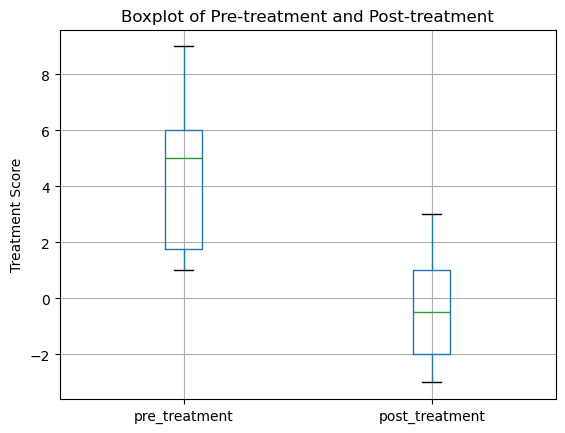

In [5]:
import matplotlib.pyplot as plt

# boxplot 그리기
fig, ax = plt.subplots()
data.boxplot(['pre_treatment', 'post_treatment'], ax=ax)
ax.set_title('Boxplot of Pre-treatment and Post-treatment')
ax.set_ylabel('Treatment Score')
plt.show()

박스 플롯은 전체적인 데이터의 분포를 시각화하는데 유용한 그래프이다.<br>
이 그래프에서는 pre_treatment와 post_treatment의 값의 범위와 중앙값, 이상치 등을 한눈에 볼 수 있다.<br>
위의 결과에서는 두 변수의 중앙값이 약간 다르게 나타났으며, post_tratment 변수의 범위가 pre_treatment 변수의 범위보다 넓게 분포했다는 것을 알 수 있다.

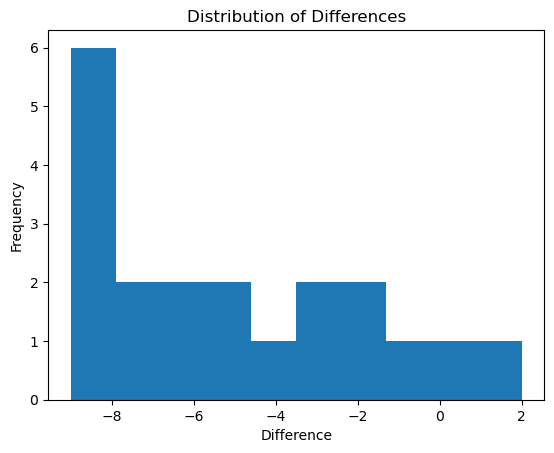

In [6]:
# 두 변수의 차이에 대한 분포를 시각화
fig, ax = plt.subplots()
data['diff'] = data['post_treatment'] - data['pre_treatment']
ax.hist(data['diff'], bins=10)
ax.set_title('Distribution of Differences')
ax.set_xlabel('Difference')
ax.set_ylabel('Frequency')
plt.show()

전처리 과정을 거친 후 환자들의 치료 전과 후의 차이를 나타내는 분포 그래프. <br>
x축은 차이, y축은 각 차이에 해당하는 환자의 수<br>